In [1]:
# check that in priority

# kpeak en fonction de z
# distance de taille angulaire (check icosmos) (pour un objet de taille PHYSIQUE (pas comoving) fixe) en fonction de z
# s'obtient en mettant tout a 0 (en particulier omegam=0)
# angle (radians) for psuedoBAO 150 cMpc structure en fonction de z
# angle (raidans) for EVOLVING (with kpeak) pseudoBAO scale vs z
# l for evolving BAO scale vs z => at z=10 on doit aavoir l~600 (j'ai plutot 900?)
# Mass of BAO structure vs z
# Grav potential at border of structure at BAO scale (GM/c^2r) vs z, should peak at z=20
# efficacite ISW vs z (delta phi durant temps de traversee de la structure)
# amplitude ISW as (deltaT/T) produit de grav pot * efficacite (facteur 2)
# should peak at z~10 with 2e-5. should be 4 e-5 with the factor 2
# last plot ISW deltaT/T as a function of l

# (also, there is a github for https://github.com/cspotz/RAMSES_Bi-Poisson)
# also read some https://www.aanda.org/articles/aa/full_html/2011/01/aa16012-10/aa16012-10.html if I have the time
    

avg density H/m^3 3.2853588737503405
age of the universe as 1/H0 in Gyr 13.96846030961612


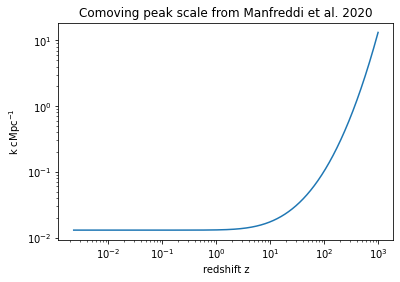

LambdaCDM(H0=70 km / (Mpc s), Om0=0, Ode0=0, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)


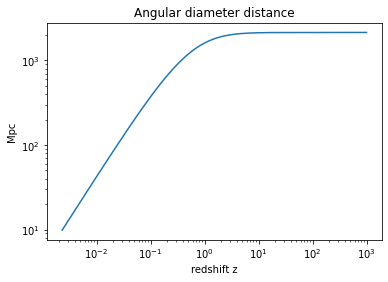

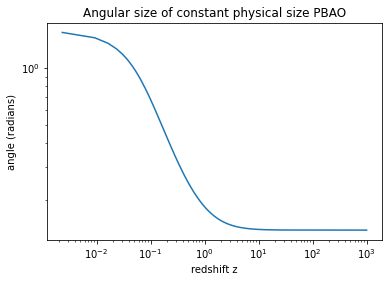

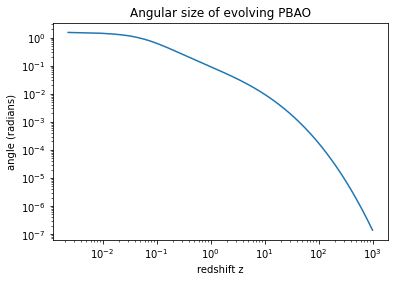

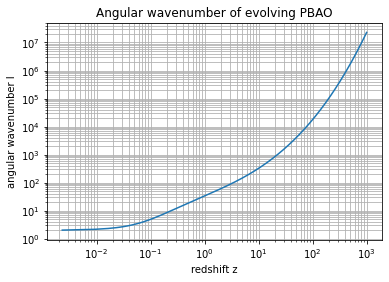

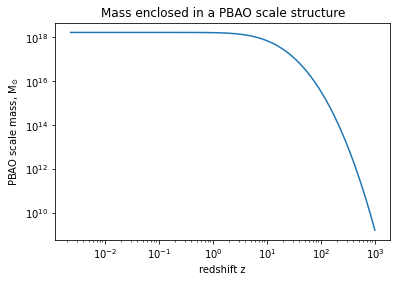

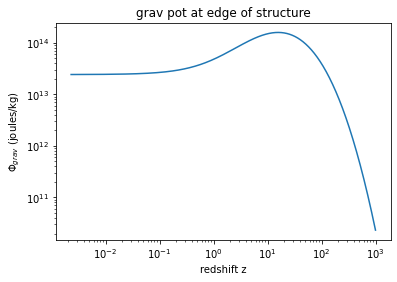

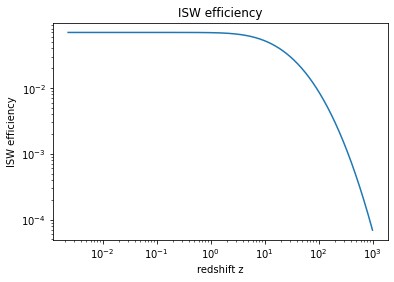

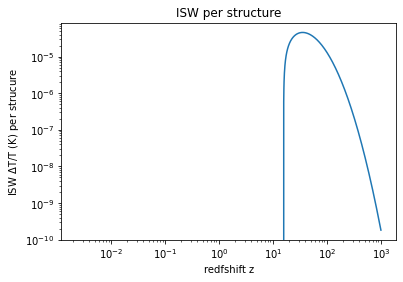

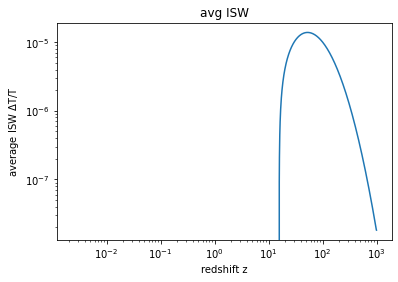

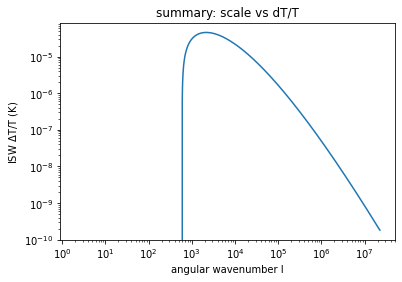

In [123]:
# Unit of k_peak in 1/Mpc
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# a few necessary quantities
#Mpcm=3.085e22 # Mpc in m
# average density:
# a fixer via la nucléosynthèse.
#Le rapport nombre de baryons, en comptant tout le monde en
# protons pour simplifier, car il n’y pratiquement pas de différence
# de masse proton/neutron, est donné par le paramètre \eta:
eta_DM = 8E-9 # Number density of baryons divided by number density of photons in Dirac-Milne
n_phot_CMB_MKSA = 4.13E8 # Number of CMB photons per meter cube at T = 2.7 K
n_avogadro_kg = 6.022E26 # Number of protons in a kilogram
rho_DM_MKSA = eta_DM*n_phot_CMB_MKSA/n_avogadro_kg # Present baryonic density in MKSA units
rho_avg=rho_DM_MKSA
print('avg density H/m^3',rho_DM_MKSA/1.67e-27)

a=np.logspace(-3.,-0.001,1000)
z=1./a-1.
#pseudo-bao scale
pbaoscale=300.*u.Mpc # Mpc
H0=70.
h=H0/100.
H0SI=70.e3*u.m/((1*u.Mpc).to(u.m))/u.s # in 1/s
print('age of the universe as 1/H0 in Gyr',(1./H0SI).to(u.yr)/1.e9/u.yr)
# therefore we can compute time sincer BB from a as
time=a/H0SI # in s

def k_peak_gc(a):
    # IMPORTANT NOTE THIS IS A COMOVING SCALE NOT PHYSICAL!
    # result in h Mpc^-1
    alphakpn=0.021
    # gabriel's value for alphakpn = 0.021
    return 0.013*np.exp(-alphakpn * np.log(a)**3)

plt.plot(z,k_peak_gc(a))
plt.xscale('log')
plt.yscale('log')
plt.ylabel('k cMpc$^{-1}$')
plt.xlabel('redshift z')
plt.title('Comoving peak scale from Manfreddi et al. 2020')
plt.show()

# distance de taille angulaire en Dirac-Milne
from astropy.cosmology import LambdaCDM
#FlatLambdaCDM.angular_diameter_distance(a)
cosmo = LambdaCDM(H0=70.,Om0=0.,Ode0=0.)
print(cosmo)
angdiamdist=cosmo.angular_diameter_distance(z)
plt.plot(z,angdiamdist)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mpc')
plt.xlabel('redshift z')
plt.title('Angular diameter distance')
plt.show()

# angle for a pbao constant physical size structure at z
plt.plot(z,np.arctan(pbaoscale/angdiamdist))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angle (radians)')
plt.title('Angular size of constant physical size PBAO')
plt.show()

# angle for a pbao structure of comoving scale pbaoscale (meaning the scale is subject to expansion)
#, whose size is shrinking with kpeak at z AND 
plt.plot(z,np.arctan((a*pbaoscale*k_peak_gc(1)/k_peak_gc(a))/angdiamdist))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angle (radians)')
plt.title('Angular size of evolving PBAO')
plt.show()

# angular wavenumber for that same evolving PBAO
# NB: PBAO wavelenfgth = 2 * PBAO scale (because a wave must be periodic and has + and -)
ls=2.*np.pi/(2.*np.arctan((a*pbaoscale*k_peak_gc(1)/k_peak_gc(a))/angdiamdist))
plt.plot(z,ls)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angular wavenumber l')
plt.title('Angular wavenumber of evolving PBAO')
plt.grid(True, which="both", ls="-")
plt.show()

# mass enclosed in PBAO structure vs z
# PBAO structure radius, comoving:
radiusmeters=(pbaoscale*k_peak_gc(1)/k_peak_gc(a)).to(u.m) # in m
# and PBAO mass: note we use rhoavg and not /a^3 because radiusmeters is the COMOVING size of the structure
PBAOmass=(4*np.pi/3)*(rhoavg)*radiusmeters**3 # in kg

plt.plot(z,PBAOmass/2.e30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('PBAO scale mass, M$_{\odot}$')
plt.title('Mass enclosed in a PBAO scale structure')
plt.show()

# grav potential at the edge of PBAO vs z
# PBAO physical scale
radiusmetersp=(a*pbaoscale*k_peak_gc(1)/k_peak_gc(a)).to(u.m) # in m
phi=6.67e-11*PBAOmass/radiusmetersp
plt.plot(z,phi)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('$\Phi_{grav}$ (joules/kg)')
plt.title('grav pot at edge of structure')
plt.show()


# ISW 'Efficiency' as crossing time / hubble time
# NB this actually does not enter the final ISW dT/T
tcross=radiusmetersp/3.e8 # just PBAO physical size divided by c
plt.plot(z,tcross/time)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('ISW efficiency')
plt.title('ISW efficiency')
plt.show()


# CMB Temperature variaition due to ISW computed as (2/c^2) * (dphi/dt) * tcross  where tcorss is the crossing time of the structure
# this is the change in energy expected as the photon crosses the structure
# note for delta phi/dt we can either do the whole symbolic derivation OR do a numerical derivative as:
dphi=np.gradient(phi) # np.gradient(phi) has same size as phi
dt=np.gradient(time)
ISWdTsT=(2/(3.e8)**2)*(dphi/dt)*tcross
plt.plot(z,ISWdTsT)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redfshift z')
plt.ylabel('ISW $\Delta$T/T (K) per strucure')
plt.title('ISW per structure')
plt.show()

# average ISW, i.e. accounting for the weight of each redshift slice
# thats required because not every photon crosses one whole structure at each time slice.
# In fact, photons cross only a fraction of a strucrture at each time slice so eacg slice can obnly contrivyte a fraction of the
# stryctyre it contains at low z and many structures at high z (plot dt/tcross to check)
aveISW=ISWdTsT*(dt/tcross)
plt.plot(z,aveISW)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('average ISW $\Delta$T/T')
plt.xlabel('redshift z')
plt.title('avg ISW')
plt.show()


# and now the dt/T as a function of ls:
plt.plot(ls,ISWdTsT)
plt.xlabel('angular wavenumber l')
plt.ylabel('ISW $\Delta$T/T (K)')
plt.xscale('log')
plt.yscale('log')
plt.title('summary: scale vs dT/T')
plt.show()


